# **Problem Dataset Story**

It is expected that a machine learning model will be developed that can predict customers who will leave the company.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 customers in California in the third quarter. It shows which customers left, stayed, or signed up for their service.

**The columns in the dataset are:**

**21 Variables, 7043 Observations**

Each row represents a unique customer.

Variables include information about the services customers are subscribed to, details about their accounts, contracts, etc.

* **Churn**: Whether the customer has churned (Yes or No) - customers who left in the last month or quarter

* **MonthlyCharges**: The amount billed to the customer on a monthly basis

* **TotalCharges**: The total amount billed to the customer

* **CustomerId**: Customer Id

* **Gender**: Gender

* **SeniorCitizen**: Whether the customer is a senior citizen (1, 0)

* **Partner**: Whether the customer has a partner (Yes, No)

* **Dependents**: Whether the customer has dependents (Yes, No) (Children, mother, father, grandmother)

* **Tenure**: The number of months the customer has been with the company

* **PhoneService**: Whether the customer has phone service (Yes, No)

* **MultipleLines**: Whether the customer has multiple lines (Yes, No, No phone service)

* **InternetService**: The type of internet service provider the customer has (DSL, Fiber optic, None)

* **OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service)

* **OnlineBackup**: Whether the customer has online backup (Yes, No, No internet service)

* **DeviceProtection**: Whether the customer has device protection (Yes, No, No internet service)

* **TechSupport**: Whether the customer receives technical support (Yes, No, No internet service)

* **StreamingTV**: Whether the customer has TV streaming (Yes, No, No internet service) This indicates if the customer uses their Internet service to stream television programs from a third-party provider

* **StreamingMovies**: Whether the customer has movie streaming (Yes, No, No internet service) This indicates if the customer uses their Internet service to stream movies from a third-party provider

* **Contract**: The customer's contract duration (Month-to-month, One year, Two years)

* **PaperlessBilling**: Whether the customer has paperless billing (Yes, No)

* **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Let's start our investigations on our data set.

# **Exploratory Data Analysis**

In [63]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**NumPy;** It is a basic library for scientific computing in Python.

**Pandas;** It is a Python library used for data analysis and data manipulation.

**Matplotlib;** It is the basic library for data visualization in Python. It is used to create line charts, bar charts, histograms, scatter plots and more.

**Seaborn;** It is a visualization library built on Matplotlib. It provides higher levels of abstraction to create more advanced and aesthetically pleasing plots than Matplotlib.

To avoid seeing some "warning" outputs;

In [64]:
warnings.filterwarnings(action='ignore')

Let's set certain display options using the Pandas library.

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The following Python code reads data from a CSV file named "Telco-Customer-Churn.csv" and converts it into a Pandas DataFrame:

In [66]:
df = pd.read_csv("Telco-Customer-Churn.csv")

The **df.info()** command provides a quick overview of the structure of data frames. Indicates how many rows and columns the data frame contains. Specifies which columns are of which data type. Shows how many missing (NaN) values are in each column. Specifies how much memory the data frame uses.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


When we look at the 'TotalCharges' property, it has a float data type, but it appears as an object.

In [68]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Now let's implement and examine a visualization method that can check if there are missing values ​​in our data set.

<Axes: >

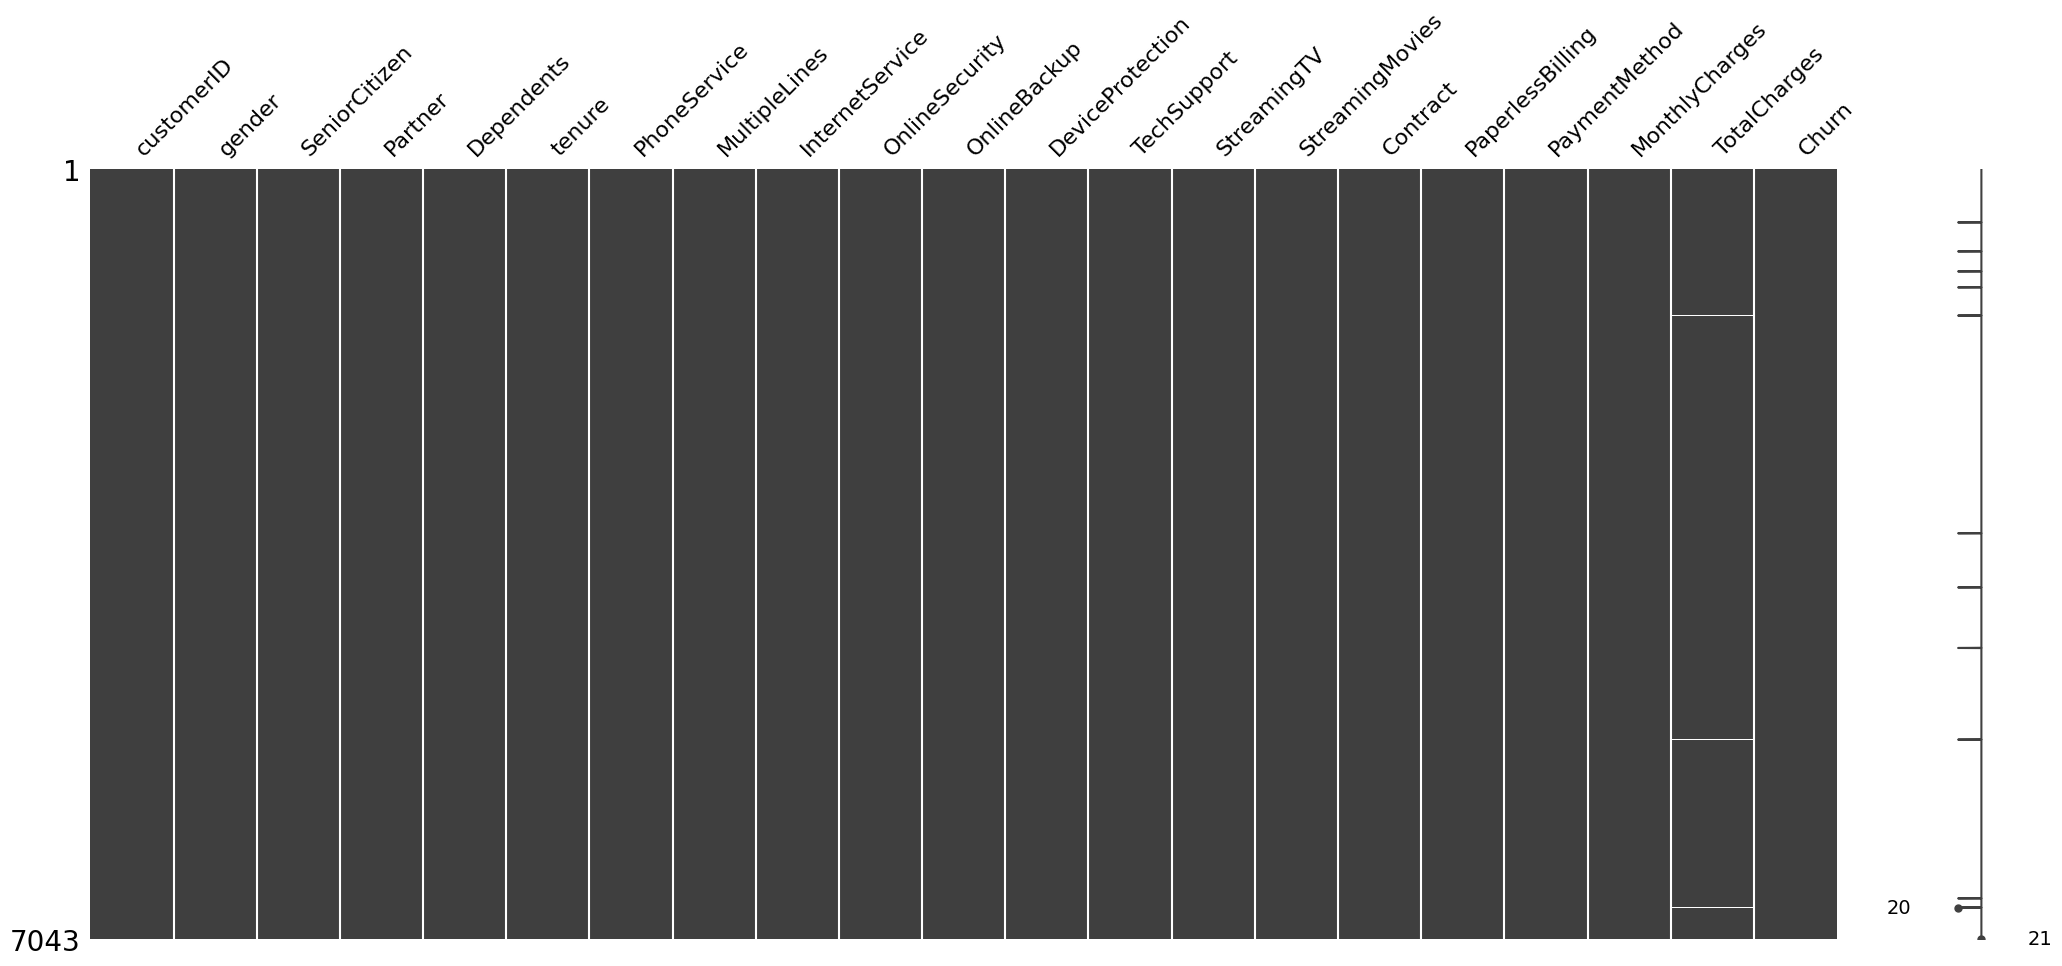

In [69]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

When you look at the graph above, the columns of features are shown continuously. That is, the columns are not made up of dashed lines of different lengths. A feature with a missing value looks like the sample image below.

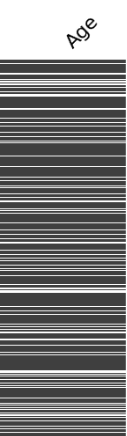

We can check whether we have missing values with the **df.isnull().sum()** command.

The **df.isnull().sum()** command calculates and returns the number of missing (NaN) values in a pandas DataFrame on a per-column basis.

In [70]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


The **df.describe().T** command provides basic statistical summaries. This command is used to quickly see basic statistical measurements of numerical data.

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


Statistical Measurements Provided;

* **Count:** Shows how many valid (non-missing) data are in each column.
* **Mean:** Specifies the arithmetic mean of the data in the column.
* **Std (Standard Deviation):** Shows how much spread (variability) the data in the column has.
* **Min:** Specifies the smallest value in the column.
* **25% (1st Quartile Value):** Indicates the first quartile (first quartile) of data.
* **50% (Median or 2nd Quartile Value):** Shows the median value (median) of the data.
* **75% (3rd Quarter Value):** Indicates the third quarter value of the data.
* **Max:** Shows the largest value in the column.

If we want to examine the first 10 observation units, we can use the **df.head(10)** command.

In [72]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.500,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.400,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.900,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.050,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.950,No


If we want to examine the last 10 observation units, we can use the **df.tail(10)** command.

In [73]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.500,2625.250,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.950,6886.250,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.700,1495.100,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.650,743.300,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.150,1419.400,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.500,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.900,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.450,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.600,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.500,No


We can use the **df.shape** command to display the size of the data frame.

In [74]:
df.shape

(7043, 21)

 As you can see, there are 7043 observation units and 21 variables.

With the **value_counts()** method, we can examine the number of values of the Churn variable according to its classes.

In [75]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


As can be seen, 5174 out of 7043 customers in our dataset did not churn us, but 1869 customers churn us. Assuming that we selected the target variable as 'Churn'; let's examine the percentage rates in terms of target classes.

In [76]:
100*df["Churn"].value_counts()/len(df)

,count
Churn,
No,73.463
Yes,26.537


Thus, we saw that 73.46% of our customers did not churn us, but 26.53% churn us. Now let's define a color palette and visualize the 'Churn' variable

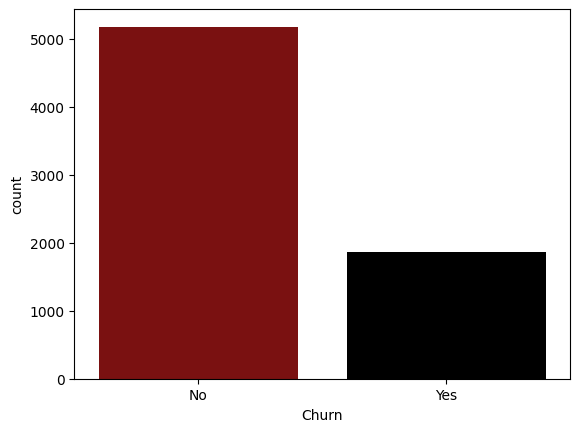

In [77]:
color_palette = ["#8b0000", "#000000"]
sns.countplot(x="Churn", data=df, palette=color_palette)
plt.show()

Let's examine it as a pie chart. Here, green color represents class 0 and orange color represents class 1.

In [78]:
import plotly.graph_objects as go
colors = ['green', 'orange']
labels = ['0','1']
values = df['Churn'].value_counts()/df['Churn'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=40,
                  marker=dict(colors=colors, line=dict(color='black', width=5)))
fig.update_layout(
    title_text="The rate at which our customers abandon us:")
fig.show()

Now let's examine the distribution of all our features one by one.

In [79]:
color_palette = ["#8b0000", "#000000", "#1abc9c", "#2980b9"]

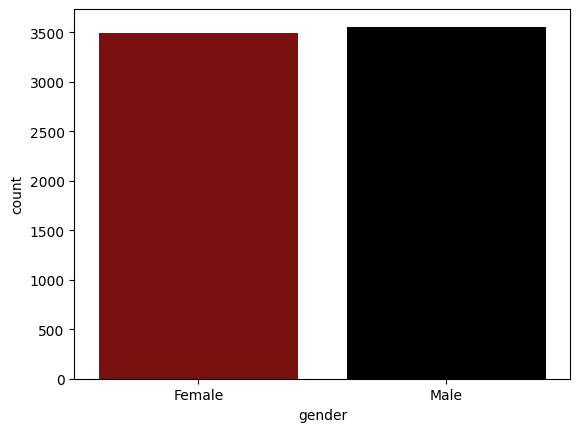

In [80]:
sns.countplot(x="gender", data=df, palette=color_palette)
plt.show()

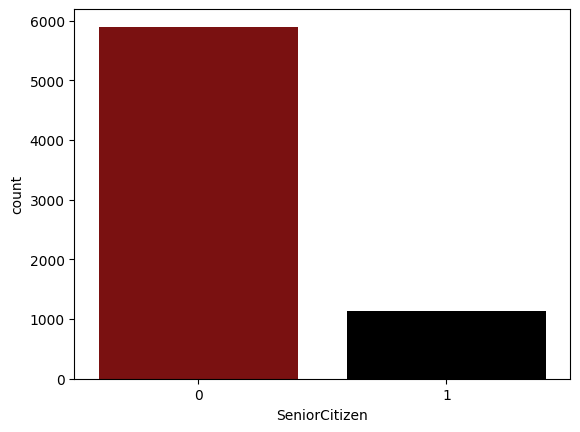

In [81]:
sns.countplot(x="SeniorCitizen", data=df, palette=color_palette)
plt.show()

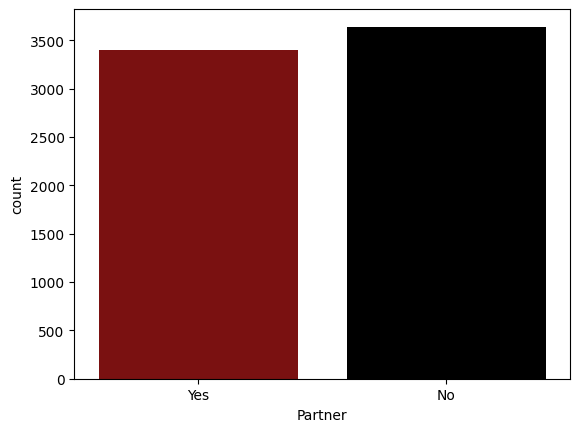

In [82]:
sns.countplot(x="Partner", data=df, palette=color_palette)
plt.show()

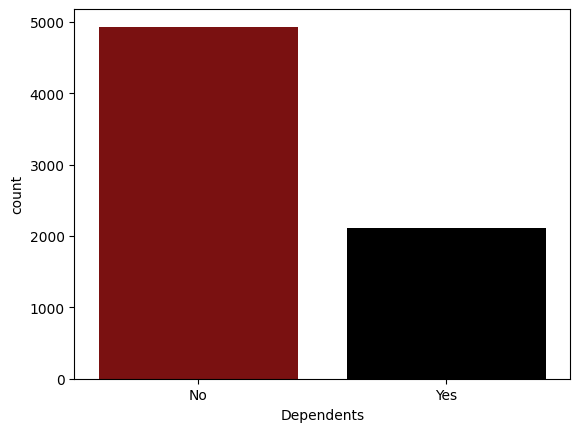

In [83]:
sns.countplot(x="Dependents", data=df, palette=color_palette)
plt.show()

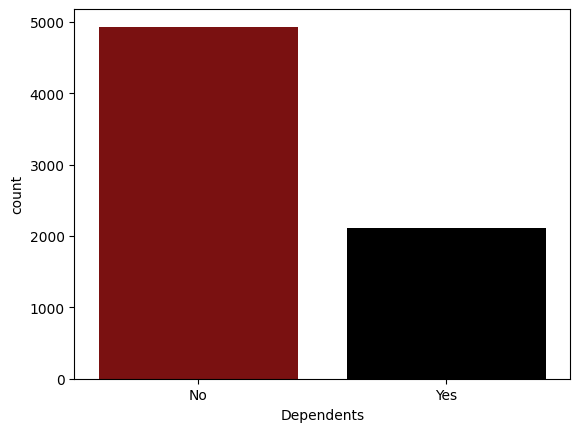

In [84]:
sns.countplot(x="Dependents", data=df, palette=color_palette)
plt.show()

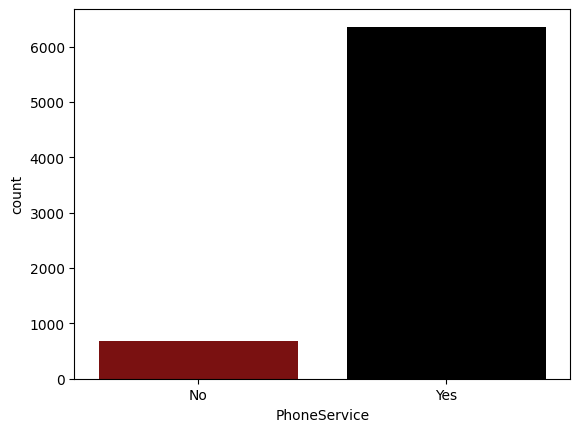

In [85]:
sns.countplot(x="PhoneService", data=df, palette=color_palette)
plt.show()

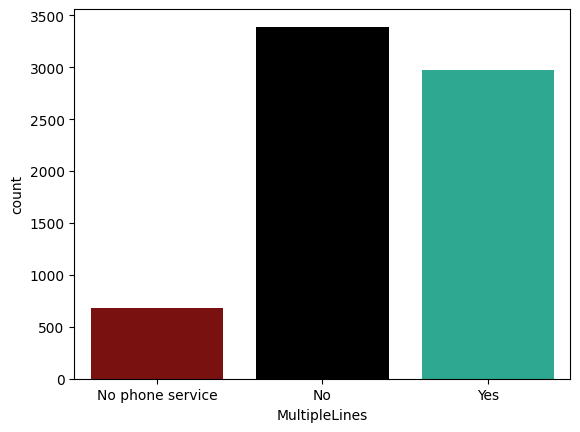

In [86]:
sns.countplot(x="MultipleLines", data=df, palette=color_palette)
plt.show()

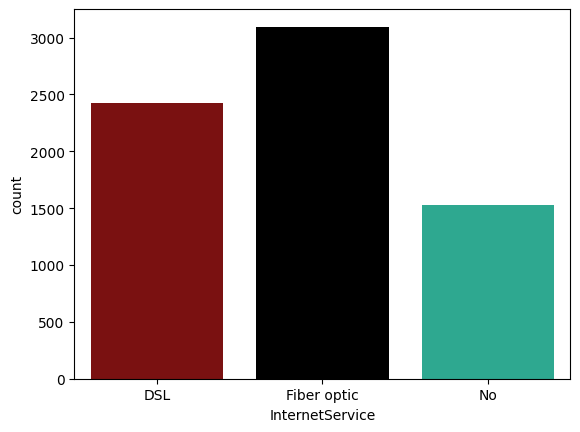

In [87]:
sns.countplot(x="InternetService", data=df, palette=color_palette)
plt.show()

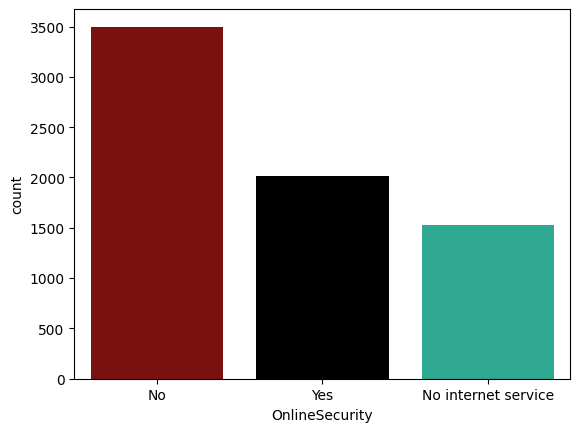

In [88]:
sns.countplot(x="OnlineSecurity", data=df, palette=color_palette)
plt.show()

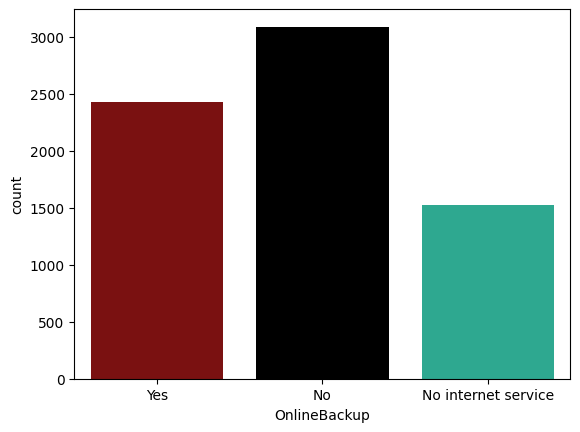

In [89]:
sns.countplot(x="OnlineBackup", data=df, palette=color_palette)
plt.show()

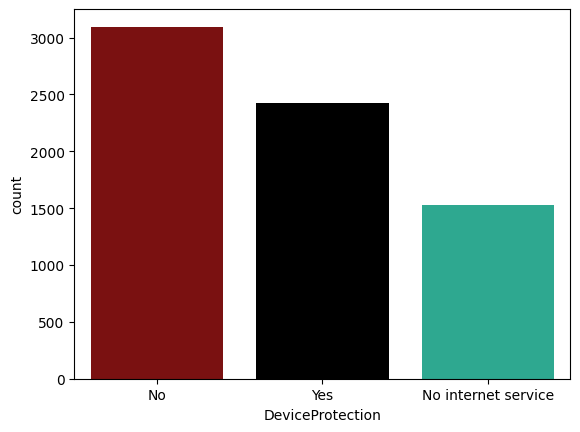

In [90]:
sns.countplot(x="DeviceProtection", data=df, palette=color_palette)
plt.show()

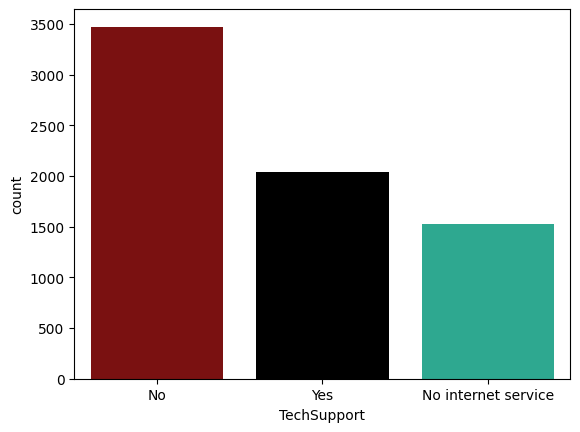

In [91]:
sns.countplot(x="TechSupport", data=df, palette=color_palette)
plt.show()

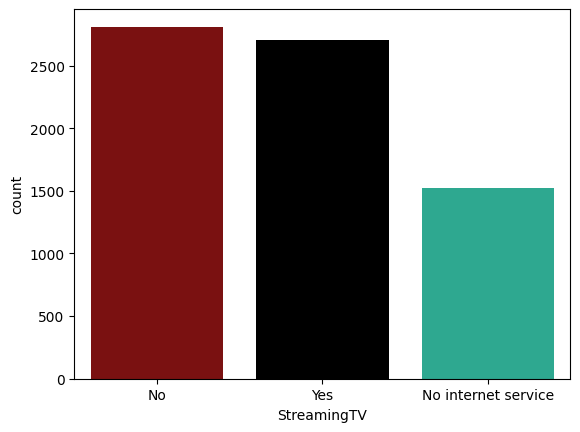

In [92]:
sns.countplot(x="StreamingTV", data=df, palette=color_palette)
plt.show()

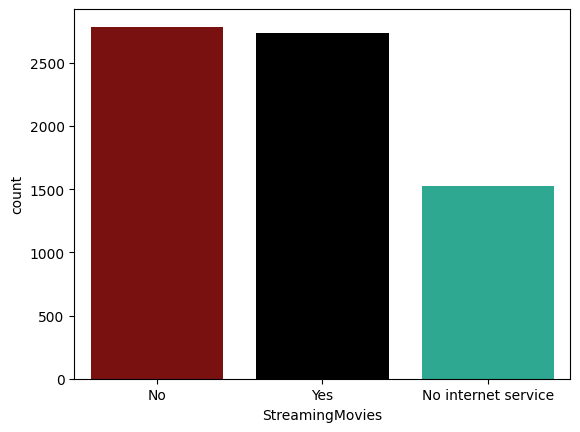

In [93]:
sns.countplot(x="StreamingMovies", data=df, palette=color_palette)
plt.show()

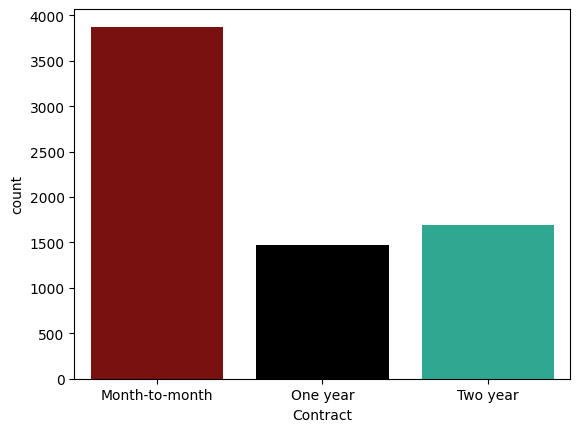

In [94]:
sns.countplot(x="Contract", data=df, palette=color_palette)
plt.show()

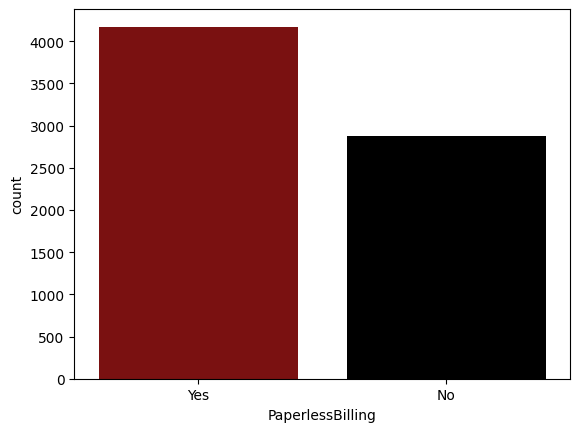

In [95]:
sns.countplot(x="PaperlessBilling", data=df, palette=color_palette)
plt.show()

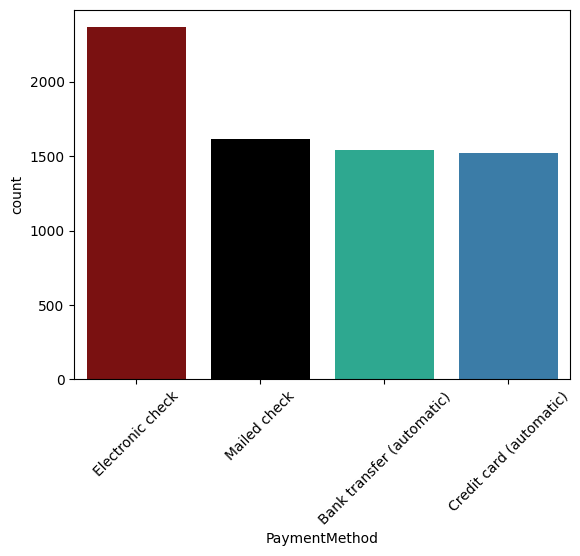

In [96]:
sns.countplot(x="PaymentMethod", data=df, palette=color_palette)
plt.xticks(rotation=45)
plt.show()

Now let's look at the proportional distribution of the target variable in terms of other classes.

In [97]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [98]:
cols = ["tenure", "MonthlyCharges"]
for col in cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No     37.570
Yes    17.979


       MonthlyCharges
Churn                
No             61.265
Yes            74.441




There are two things we can understand from this data. First, our customers who leave us are mostly new customers. Second, we collect more monthly amounts from our new customers.

Similarly, when we look at the distribution of the dependency attribute according to the churn target variable above, the vast majority of our customers who leave us churn us. Now let's reconsider the visualization of categorical variables collectively.

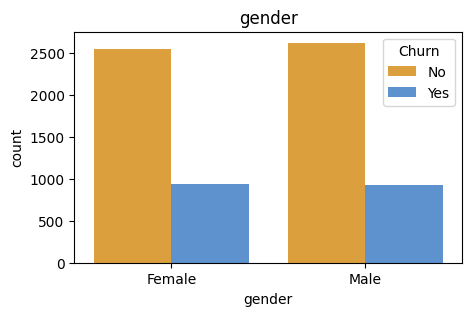

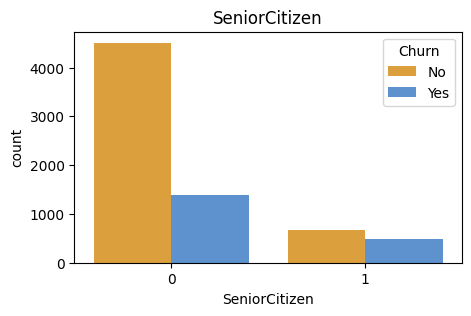

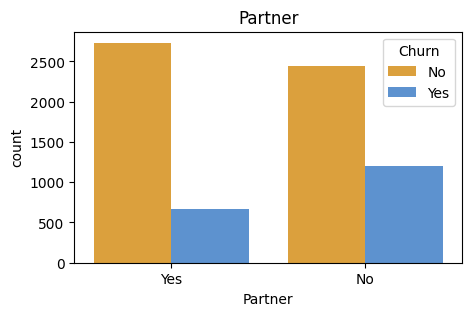

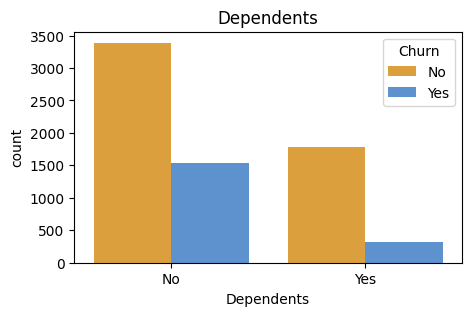

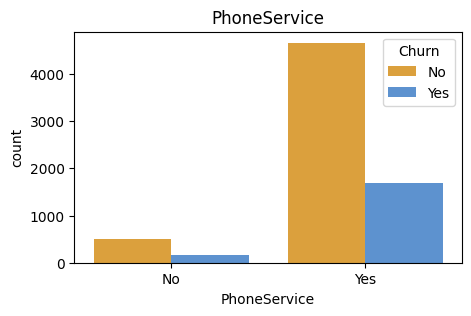

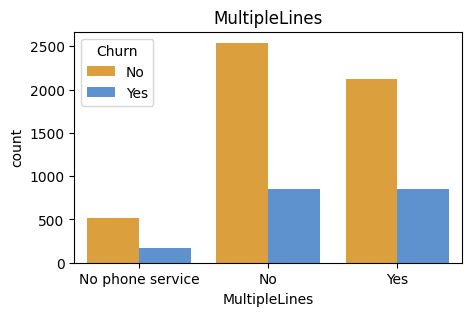

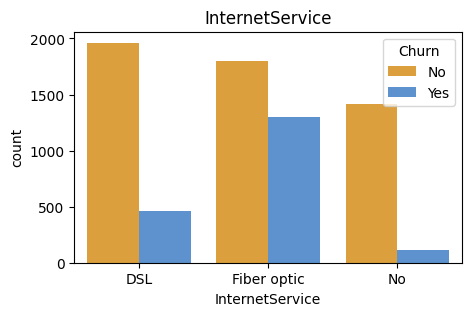

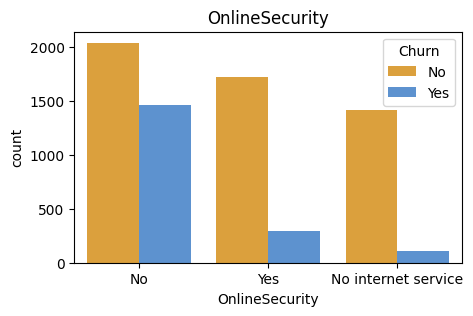

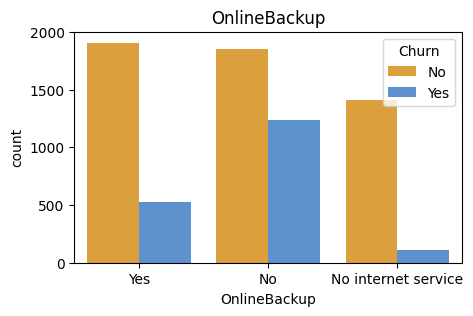

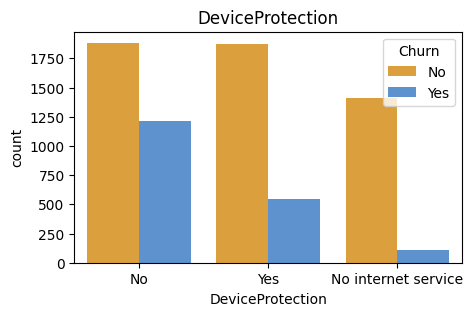

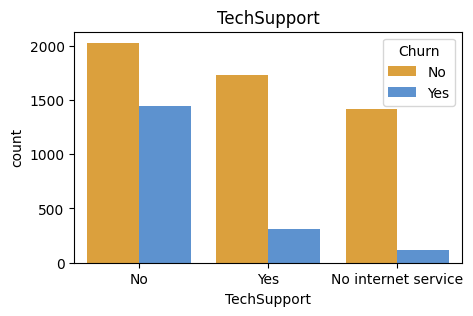

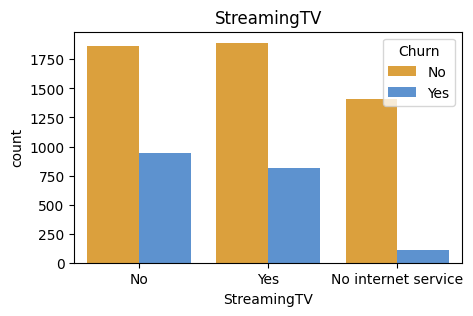

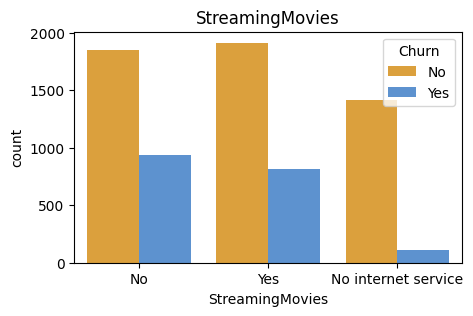

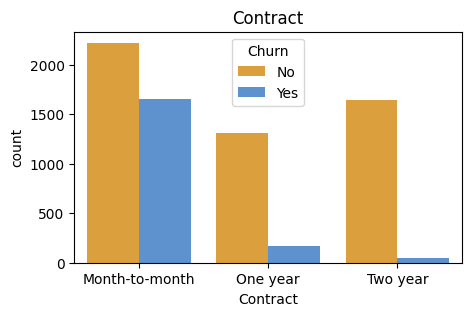

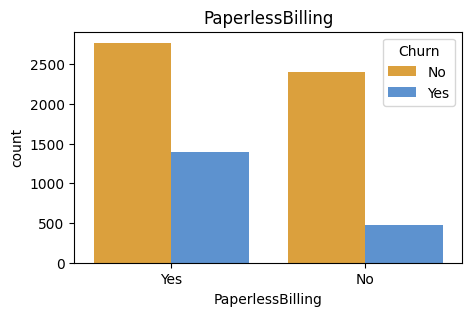

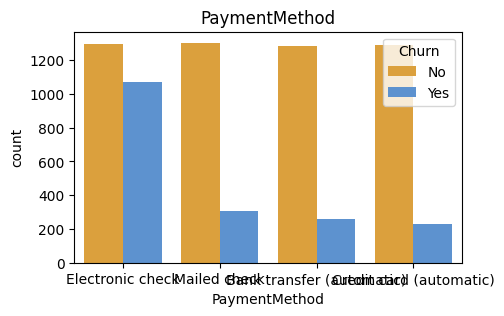

In [99]:
colors = {'Yes': '#4A90E2', 'No': '#F5A623'}

palette = {0: '#4A90E2', 1: '#F5A623'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure', 'customerID'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

Now let's visualize our numeric variables.

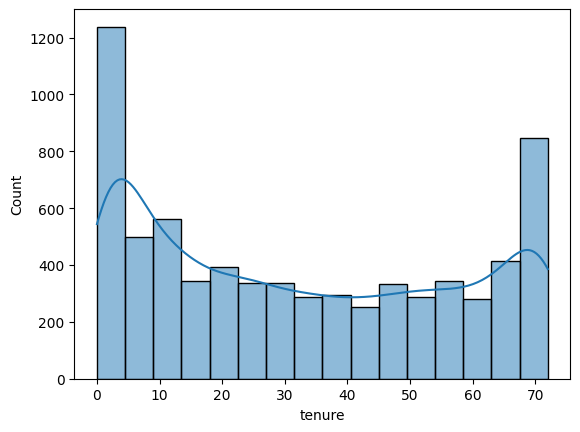

In [100]:
sns.histplot(x=df['tenure'], kde=True)
plt.show()

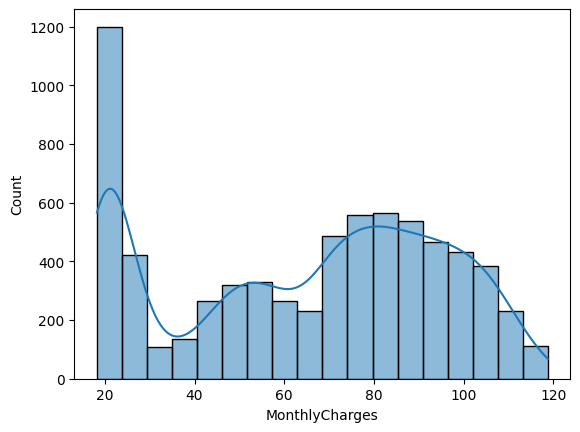

In [101]:
sns.histplot(x=df['MonthlyCharges'], kde=True)
plt.show()

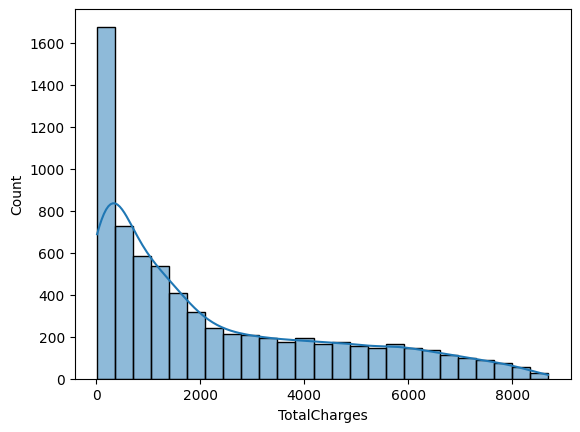

In [102]:
sns.histplot(x=df['TotalCharges'], kde=True)
plt.show()

# **Feature Engineering**

Now we can continue our steps by trying to detect outliers. Outlier detection is the process of identifying and analyzing data in a data set that deviates significantly from usual trends. Outliers are data that differ from the rest of the data, fall outside the norm, or disrupt the natural distribution of the data.

Now let's use the **"outlier_thresholds"** function to calculate the upper and lower threshold values. Then, let's use the **"check_outlier"** function to identify variables containing outliers.

In [103]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Now let's create a list structure and use this list structure to detect whether there are outliers by sending it to the function with a for loop. While performing this process, I will be working with numerical data, so let's remove non-numeric data from the data frame.

In [104]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_columns:
    if col == "SeniorCitizen":
        continue
    if check_outlier(df, col):
        print(f"Column with outlier: {col}")
    else:
        print(f"Column with no outliers: {col}")

Column with no outliers: tenure
Column with no outliers: MonthlyCharges
Column with no outliers: TotalCharges


Since the **'SeniorCitizen'** attribute behaves like a categorical variable, we will not perform outlier extraction.

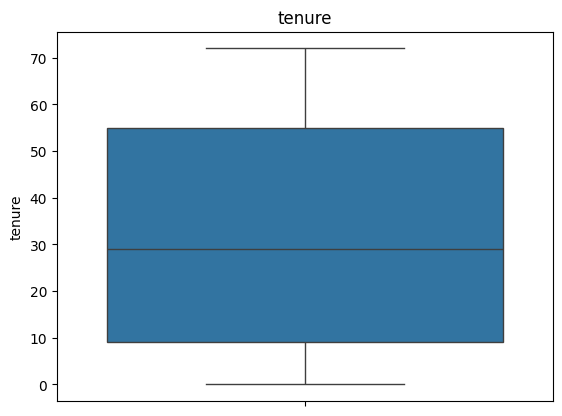

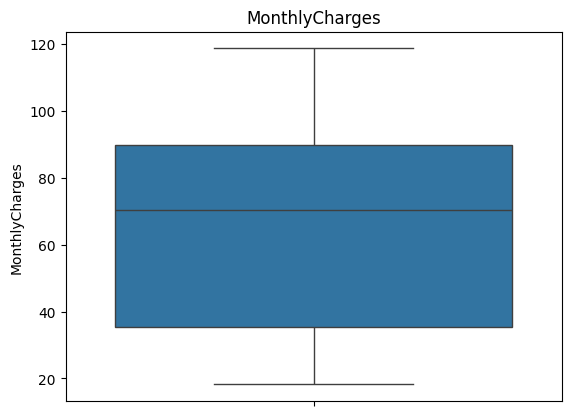

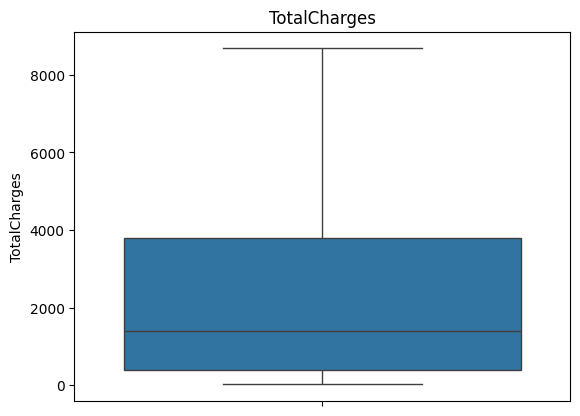

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_columns:
    if col == "SeniorCitizen":
        continue
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
from joblib import dump, load

In [107]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]

    #cat_but_car
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

This function above first detects the text type "object" columns in the data frame and adds them to the categorical columns list **"cat_cols"**. This process is based on the assumption that text-based variables in the data frame generally match categorical data. Then, we created a list called **"num_but_cat"**. This list contains columns whose data type is not text but whose number of unique values ​​**"nunique()"** is smaller than a certain threshold **"cat_th"**. Such columns are variables that can be considered categorical even though their data type seems numeric. For example, a variable that contains only a few unique values ​​such as 1, 2, and 3 can actually be a categorical variable. This is important.

The **"cat_cols"** and **"num_but_cat"** lists are merged to update **"cat_cols"** and this process results in a complete categorical column list. However, there may be columns with high cardinality in this list. We put these columns in a separate list called **"cat_but_car"**. The purpose of this step is to separate categorical variables with too many unique values ​​from the normal categorical column list. This indicates that such variables should be carefully processed before being used directly in models.

Next, we define numeric columns **"num_cols"**. All columns in the data frame that are not text are initially considered as potential numeric columns. However, columns previously added to the "num_but_cat" list are removed from this list. This is to ensure that columns that appear to be numeric but are actually categorical are not included among the real numeric columns.

In [108]:
def dataproprocessing(dataframe):

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)

    dataframe["TotalCharges"].fillna(dataframe["TotalCharges"].median(), inplace=True)

    dataframe['Churn'] = dataframe['Churn'].replace({'Yes': 1, 'No': 0})

    # feature engineering
    dataframe.loc[(dataframe["tenure"] >= 0) & (dataframe["tenure"] <= 12), "NEW_TENURE_YEAR"] = "0-1 Year"
    dataframe.loc[(dataframe["tenure"] > 12) & (dataframe["tenure"] <= 24), "NEW_TENURE_YEAR"] = "1-2 Year"
    dataframe.loc[(dataframe["tenure"] > 24) & (dataframe["tenure"] <= 36), "NEW_TENURE_YEAR"] = "2-3 Year"
    dataframe.loc[(dataframe["tenure"] > 36) & (dataframe["tenure"] <= 48), "NEW_TENURE_YEAR"] = "3-4 Year"
    dataframe.loc[(dataframe["tenure"] > 48) & (dataframe["tenure"] <= 60), "NEW_TENURE_YEAR"] = "4-5 Year"
    dataframe.loc[(dataframe["tenure"] > 60) & (dataframe["tenure"] <= 72), "NEW_TENURE_YEAR"] = "5-6 Year"

    dataframe["NEW_Engaged"] = dataframe["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

    dataframe["NEW_noProt"] = dataframe.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (
                x["TechSupport"] != "Yes") else 0, axis=1)

    dataframe["NEW_Young_Not_Engaged"] = dataframe.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0,
                                          axis=1)

    dataframe['NEW_TotalServices'] = (dataframe[['PhoneService', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

    dataframe["NEW_FLAG_ANY_STREAMING"] = dataframe.apply(
        lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

    dataframe["NEW_FLAG_AutoPayment"] = dataframe["PaymentMethod"].apply(
        lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

    dataframe["NEW_AVG_Charges"] = dataframe["TotalCharges"] / (dataframe["tenure"] + 1)

    dataframe["NEW_Increase"] = dataframe["NEW_AVG_Charges"] / dataframe["MonthlyCharges"]

    dataframe["NEW_AVG_Service_Fee"] = dataframe["MonthlyCharges"] / (dataframe['NEW_TotalServices'] + 1)

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)

    cat_cols.remove("Churn")

    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=True, dtype=int)

    scaler = MinMaxScaler()

    dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])

    dump(scaler, 'scaler.joblib')

    dataframe.columns = [col.replace(' ', '_').upper() for col in dataframe.columns]

    y = dataframe["CHURN"]
    X = dataframe.drop(["CHURN", "CUSTOMERID"], axis=1)

    return X, y

In [109]:
X, y = dataproprocessing(df)

The success of machine learning models is largely dependent on data quality and data processing techniques. Data manipulation is necessary to better understand the model, speed up the learning process, and increase its accuracy.

Since the **'TotalCharges'** column contains textual data (string), we converted it to a numeric format with pd.to_numeric.

We created an attribute called **'NEW_TENURE_YEAR'** to group time-based customer behaviors and provide new insights that the model can make sense of. We created an attribute by dividing the time spent by the user in the company (in months) into different yearly categories.

We created an attribute called **'NEW_noProt'** to analyze the behavior of unprotected customers and measure their loyalty. We defined it according to whether the customer has any of the services such as online backup, device protection, or technical support.

We created an attribute called **'NEW_Young_Not_Engaged'** to understand the behavior of groups with specific demographic characteristics. We defined it to target young and unengaged customers.

To analyze the behavior of users who receive more services, we created the attribute named **'NEW_TotalServices'**. We calculated the total number of services received by the user.

To evaluate payment habits and media consumption preferences, we created the attributes named **'NEW_FLAG_ANY_STREAMING'** and **'NEW_FLAG_AutoPayment'**. We created it for streaming service users and customers who prefer automatic payment methods.

To understand and segment financial behaviors, we created the attributes named **'NEW_AVG_Charges'**, **'NEW_Increase'** and **'NEW_AVG_Service_Fee'**. We defined financial characteristics such as average fees per customer and fee per service.

# **Modeling**

In [110]:
! pip install xgboost catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In this section, we will first import the libraries we need. Then, we will make a train test distinction with the hold-out method. Since the data set we have is an unbalanced data set, we will also apply the **SMOTE technique** and define a function to print the model results.

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [113]:
smote = SMOTE(random_state=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [114]:
def results_summary(cv_results, state="None", model_name="None"):
  print(f"===== {state} Hyperparameter Optimization: {model_name} Model =====")
  print("f1 score: ", cv_results['test_f1'].mean())
  print("precision score: ", cv_results['test_precision'].mean())
  print("recall score: ", cv_results['test_recall'].mean())
  print("accuracy score: ", cv_results['test_accuracy'].mean())
  print("roc_auc score: ", cv_results['test_roc_auc'].mean())

In [115]:
class_ratio = len(df[df['Churn'] == 0]) / len(df[df['Churn'] == 1])

# **CART Model**

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
cart_model = DecisionTreeClassifier(random_state=5, class_weight='balanced').fit(X_train, y_train)

In [118]:
cv_results = cross_validate(cart_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="CART")

===== Before Hyperparameter Optimization: CART Model =====
f1 score:  0.4806045190866275
precision score:  0.4835160801245852
recall score:  0.47846153846153844
accuracy score:  0.7273833671399593
roc_auc score:  0.6477426361517271


In [119]:
cart_params = {'max_depth': range(3, 15),
               "min_samples_split": range(2, 15),
               "max_features": [7, 8, 9, 10, 11],
               "min_samples_leaf": [2, 4, 7, 9, 12, 15]}

In [120]:
cart_best_grid = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

cart_final = cart_model.set_params(**cart_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 5 folds for each of 4680 candidates, totalling 23400 fits


In [121]:
cv_results = cross_validate(cart_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="CART")

===== After Hyperparameter Optimization: CART Model =====
f1 score:  0.6183295531927184
precision score:  0.5151317659763734
recall score:  0.7738461538461539
accuracy score:  0.7480730223123733
roc_auc score:  0.8135410044500955


In [122]:
cv_results = cross_validate(cart_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="CART")

===== Smote with After Hyperparameter Optimization: CART Model =====
f1 score:  0.7840940780710219
precision score:  0.7485294786341583
recall score:  0.8245179063360881
accuracy score:  0.7736914600550964
roc_auc score:  0.8412006997093397


# **CatBoost Model**

In [123]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=5, verbose=False, scale_pos_weight=class_ratio).fit(X_train, y_train)

In [124]:
cv_results = cross_validate(catboost_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="CatBoost")

===== Before Hyperparameter Optimization: CatBoost Model =====
f1 score:  0.6217580474956549
precision score:  0.5471088602821469
recall score:  0.7207692307692308
accuracy score:  0.7685598377281948
roc_auc score:  0.8341629582538672


In [125]:
catboost_params = {"iterations": [100, 200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 4, 6, 8],
                   #"subsample": [0.5, 0.7, 0.8, 1.0],
                   #"colsample_bylevel": [0.5, 0.7, 1.0]
}

In [126]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=False).fit(X_train, y_train)

catboost_final = CatBoostClassifier(random_state=5, **catboost_best_grid.best_params_, verbose=False)

catboost_final.fit(X_train, y_train)

In [127]:
cv_results = cross_validate(catboost_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="CatBoost")

===== After Hyperparameter Optimization: CatBoost Model =====
f1 score:  0.5449056631344809
precision score:  0.617448658198317
recall score:  0.48769230769230776
accuracy score:  0.7851926977687627
roc_auc score:  0.8172854418308964


In [128]:
cv_results = cross_validate(catboost_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="CatBoost")

===== Smote with After Hyperparameter Optimization: CatBoost Model =====
f1 score:  0.8478778618396969
precision score:  0.8465595703455042
recall score:  0.8592286501377411
accuracy score:  0.8530303030303031
roc_auc score:  0.9295145292140032


# **GBM Model**

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=5).fit(X_train, y_train)

In [130]:
cv_results = cross_validate(gbm_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="GBM")

===== Before Hyperparameter Optimization: GBM Model =====
f1 score:  0.5589705695314989
precision score:  0.6573239751458834
recall score:  0.48692307692307696
accuracy score:  0.7973630831643002
roc_auc score:  0.8382109557109556


In [131]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [132]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [133]:
cv_results = cross_validate(gbm_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="GBM")

===== After Hyperparameter Optimization: GBM Model =====
f1 score:  0.5769306749285915
precision score:  0.6671971250705264
recall score:  0.5084615384615384
accuracy score:  0.803448275862069
roc_auc score:  0.8432644628099173


In [134]:
cv_results = cross_validate(gbm_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="GBM")

===== Smote with After Hyperparameter Optimization: GBM Model =====
f1 score:  0.8136842902939826
precision score:  0.7972104571415982
recall score:  0.8336088154269973
accuracy score:  0.8115702479338843
roc_auc score:  0.8923119246560269


# **LightGBM Model**

In [135]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=5, scale_pos_weight=class_ratio).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1300, number of negative: 3630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263692 -> initscore=-1.026868
[LightGBM] [Info] Start training from score -1.026868


In [136]:
cv_results = cross_validate(lgbm_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="LightGBM")

[LightGBM] [Info] Number of positive: 1040, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263692 -> initscore=-1.026868
[LightGBM] [Info] Start training from score -1.026868
[LightGBM] [Info] Number of positive: 1040, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 50
[LightGBM] [Info] [binar

In [137]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [138]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=42).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 1300, number of negative: 3630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263692 -> initscore=-1.026868
[LightGBM] [Info] Start training from score -1.026868
[LightGBM] [Info] Number of positive: 1300, number of negative: 3630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train s

In [139]:
cv_results = cross_validate(lgbm_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="LightGBM")

[LightGBM] [Info] Number of positive: 1040, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263692 -> initscore=-1.026868
[LightGBM] [Info] Start training from score -1.026868
[LightGBM] [Info] Number of positive: 1040, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 50
[LightGBM] [Info] [binar

In [140]:
cv_results = cross_validate(lgbm_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="LightGBM")

[LightGBM] [Info] Number of positive: 2904, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 5808, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2904, number of negative: 2904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 5808, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


# **Logistic Regression Model**

In [141]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=5, class_weight='balanced')

In [142]:
cv_results = cross_validate(log_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="Logitic Regression")

===== Before Hyperparameter Optimization: Logitic Regression Model =====
f1 score:  0.627109994765549
precision score:  0.517777896984003
recall score:  0.7961538461538462
accuracy score:  0.7498985801217039
roc_auc score:  0.8444564526382707


In [143]:
log_params = {"max_iter": [100, 200, 300, 400],
              "tol": [0.0001, 0.001, 0.01, 0.1],
              "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [144]:
log_best_grid = GridSearchCV(log_model, log_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

log_final = log_model.set_params(**log_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [145]:
cv_results = cross_validate(log_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="Logitic Regression")

===== After Hyperparameter Optimization: Logitic Regression Model =====
f1 score:  0.6288276208482433
precision score:  0.5278152815655057
recall score:  0.78
accuracy score:  0.7565922920892495
roc_auc score:  0.8434435261707989


In [146]:
cv_results = cross_validate(log_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="Logitic Regression")

===== Smote with After Hyperparameter Optimization: Logitic Regression Model =====
f1 score:  0.8116764361725555
precision score:  0.8079331000690647
recall score:  0.822038567493113
accuracy score:  0.8147382920110193
roc_auc score:  0.8969685586139379


# **Multi-Layer Perceptron Model**

In [147]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=5)

In [148]:
cv_results = cross_validate(mlp_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="Multi-Layer Perceptron")

===== Before Hyperparameter Optimization: Multi-Layer Perceptron Model =====
f1 score:  0.5272856666229472
precision score:  0.5410594227004989
recall score:  0.5153846153846154
accuracy score:  0.7565922920892495
roc_auc score:  0.7759302818393727


In [149]:
mlp_params = {
    "hidden_layer_sizes": [(10,), (50,), (100,)],
    "activation": ["relu", "logistic", "tanh"],
    "max_iter": [500, 1000, 1500],
    "alpha": [0.0001, 0.001, 0.01]}

In [150]:
mlp_best_grid = GridSearchCV(mlp_model, mlp_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

mlp_final = mlp_model.set_params(**mlp_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [151]:
cv_results = cross_validate(mlp_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="Multi-Layer Perceptron")

===== After Hyperparameter Optimization: Multi-Layer Perceptron Model =====
f1 score:  0.5857367177362074
precision score:  0.6634383438998522
recall score:  0.5246153846153845
accuracy score:  0.8042596348884382
roc_auc score:  0.8425863530408986


In [152]:
cv_results = cross_validate(mlp_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="Multi-Layer Perceptron")

===== Smote with After Hyperparameter Optimization: Multi-Layer Perceptron Model =====
f1 score:  0.8134554910099805
precision score:  0.8158106642886427
recall score:  0.8214876033057852
accuracy score:  0.8196969696969697
roc_auc score:  0.90529259537524


# **Random Forests Model**

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=5, class_weight='balanced')

In [154]:
cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="Random Forests")

===== Before Hyperparameter Optimization: Random Forests Model =====
f1 score:  0.5368687771640639
precision score:  0.644084031657648
recall score:  0.4607692307692307
accuracy score:  0.7904665314401623
roc_auc score:  0.8232294977749524


In [155]:
rf_params = {"max_depth": [3, 5, 8, 10, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [50, 100, 200, 500]}

In [156]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [157]:
cv_results = cross_validate(rf_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="Random Forests")

===== After Hyperparameter Optimization: Random Forests Model =====
f1 score:  0.5994842831817586
precision score:  0.6244473915645605
recall score:  0.5769230769230769
accuracy score:  0.7967545638945234
roc_auc score:  0.8335399449035812


In [158]:
cv_results = cross_validate(rf_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="Random Forests")

===== Smote with After Hyperparameter Optimization: Random Forests Model =====
f1 score:  0.8483938019957658
precision score:  0.8293524018730025
recall score:  0.871900826446281
accuracy score:  0.846694214876033
roc_auc score:  0.9229308486821635


# **Support Vector Machine Model**

In [159]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1000, random_state=5, class_weight='balanced')

In [160]:
cv_results = cross_validate(svm_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="Support Vector Machine")

===== Before Hyperparameter Optimization: Support Vector Machine Model =====
f1 score:  0.6113569088534426
precision score:  0.49164191178027483
recall score:  0.8099999999999999
accuracy score:  0.7275862068965517
roc_auc score:  0.8431394363212545


In [161]:
svm_params = {"cache_size": [100, 200, 400],
              "tol": [0.01, 0.1],
              "degree": [2, 3, 4]}

In [162]:
svm_best_grid = GridSearchCV(svm_model, svm_params, cv=3, n_jobs=-1, verbose=True).fit(X_train, y_train)

svm_final = svm_model.set_params(**svm_best_grid.best_params_, random_state=5).fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [163]:
cv_results = cross_validate(svm_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="Support Vector Machine")

===== After Hyperparameter Optimization: Support Vector Machine Model =====
f1 score:  0.6117081966693293
precision score:  0.49209103184194875
recall score:  0.8099999999999999
accuracy score:  0.7279918864097363
roc_auc score:  0.8429889807162535


In [164]:
cv_results = cross_validate(svm_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="Support Vector Machine")

===== Smote with After Hyperparameter Optimization: Support Vector Machine Model =====
f1 score:  0.8115493000529682
precision score:  0.8318117268571319
recall score:  0.8063360881542699
accuracy score:  0.8235537190082644
roc_auc score:  0.909823630747748


# **K-Nearest Neighbor Model**

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(weights='distance')

In [177]:
cv_results = cross_validate(knn_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="KNN")

===== Before Hyperparameter Optimization: KNN Model =====
f1 score:  0.5280010107571401
precision score:  0.5463338052523224
recall score:  0.5115384615384615
accuracy score:  0.759026369168357
roc_auc score:  0.7576891290527654


In [178]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]
}

In [179]:
knn_best_grid = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

knn_final = KNeighborsClassifier(**knn_best_grid.best_params_).fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [180]:
cv_results = cross_validate(knn_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="KNN")

===== After Hyperparameter Optimization: KNN Model =====
f1 score:  0.5598492583918111
precision score:  0.5704758598885757
recall score:  0.5507692307692308
accuracy score:  0.7716024340770791
roc_auc score:  0.7955446069082432


In [181]:
cv_results = cross_validate(knn_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="KNN")

===== Smote with After Hyperparameter Optimization: KNN Model =====
f1 score:  0.8203356507973334
precision score:  0.746403752996992
recall score:  0.9112947658402204
accuracy score:  0.8009641873278237
roc_auc score:  0.8864894246749995


# **Naive Bayes Model**

In [182]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [183]:
cv_results = cross_validate(nb_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Before", model_name="Naive Bayes")

===== Before Hyperparameter Optimization: Naive Bayes Model =====
f1 score:  0.5722890707071009
precision score:  0.4307351747050566
recall score:  0.8530769230769231
accuracy score:  0.6634888438133875
roc_auc score:  0.8099999999999999


In [184]:
nb_params = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [185]:
nb_best_grid = GridSearchCV(nb_model, nb_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

nb_final = GaussianNB(var_smoothing=nb_best_grid.best_params_['var_smoothing']).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [186]:
cv_results = cross_validate(nb_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="After", model_name="Naive Bayes")

===== After Hyperparameter Optimization: Naive Bayes Model =====
f1 score:  0.5724311723365776
precision score:  0.4308966025803002
recall score:  0.8530769230769231
accuracy score:  0.6636916835699797
roc_auc score:  0.8108354524263616


In [187]:
cv_results = cross_validate(nb_final, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
results_summary(cv_results, state="Smote with After", model_name="Naive Bayes")

===== Smote with After Hyperparameter Optimization: Naive Bayes Model =====
f1 score:  0.770857159749867
precision score:  0.6991514368766517
recall score:  0.8592286501377411
accuracy score:  0.7446280991735538
roc_auc score:  0.8338154269972451


# **Results**

In [221]:
y_pred = cart_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1544
           1       0.52      0.79      0.63       569

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



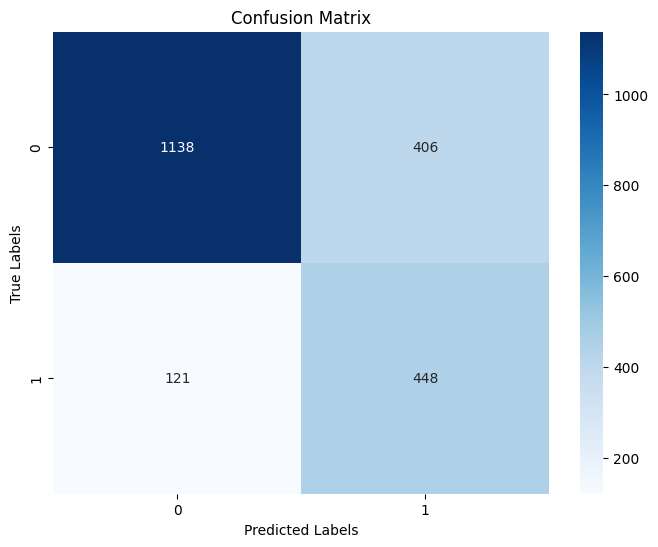

In [223]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [224]:
y_pred = catboost_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1544
           1       0.62      0.50      0.56       569

    accuracy                           0.78      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



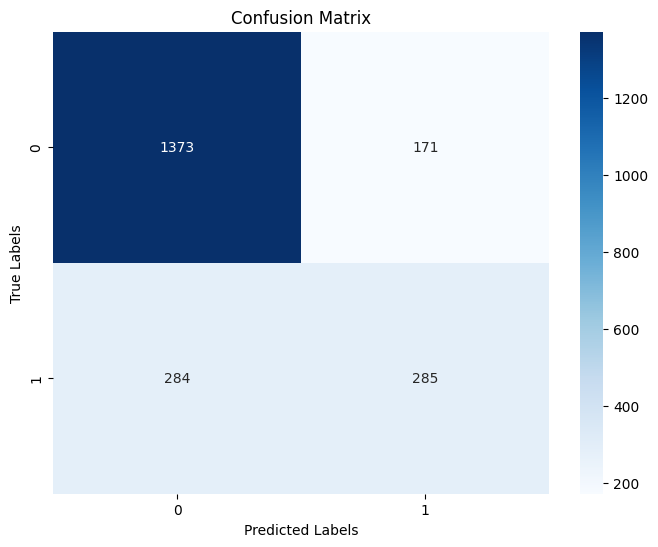

In [225]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [226]:
y_pred = gbm_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1544
           1       0.67      0.52      0.59       569

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



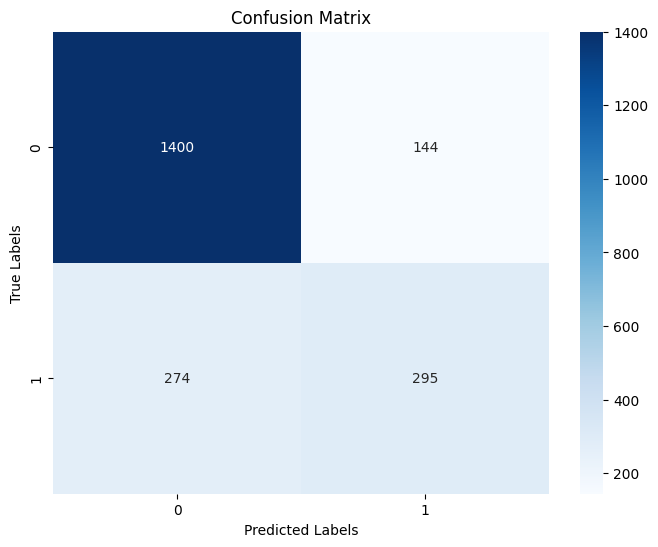

In [227]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [228]:
y_pred = lgbm_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1544
           1       0.62      0.63      0.63       569

    accuracy                           0.80      2113
   macro avg       0.74      0.75      0.74      2113
weighted avg       0.80      0.80      0.80      2113



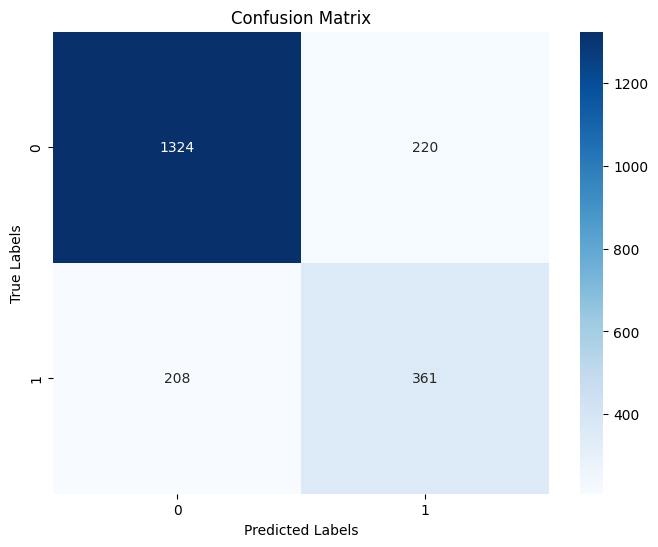

In [229]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [230]:
y_pred = log_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1544
           1       0.54      0.77      0.63       569

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



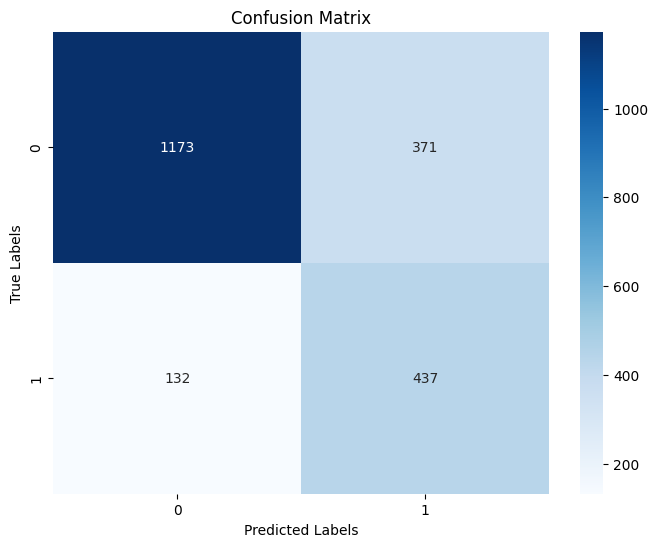

In [231]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [232]:
y_pred = mlp_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1544
           1       0.65      0.50      0.56       569

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



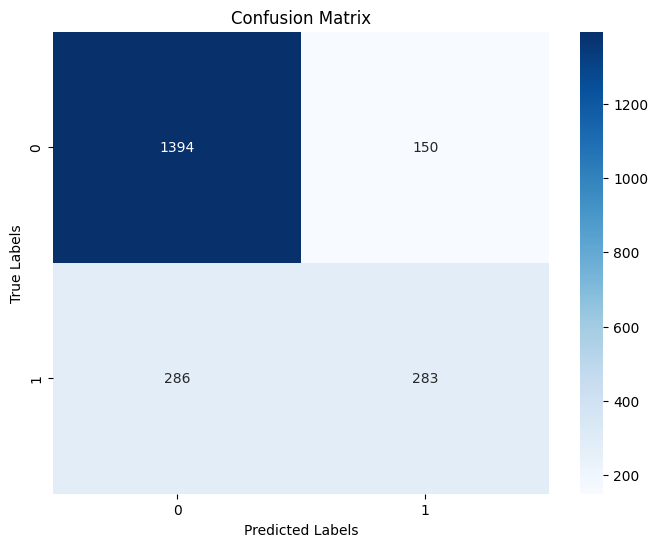

In [233]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [234]:
y_pred = rf_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1544
           1       0.62      0.57      0.60       569

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



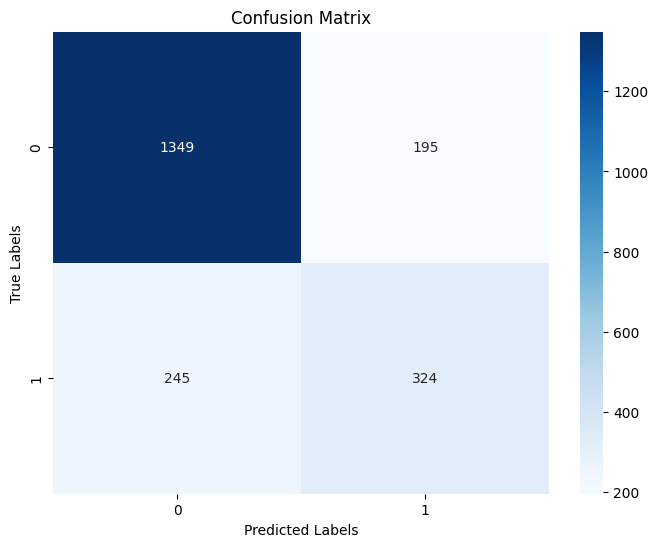

In [235]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [236]:
y_pred = svm_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1544
           1       0.52      0.80      0.63       569

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



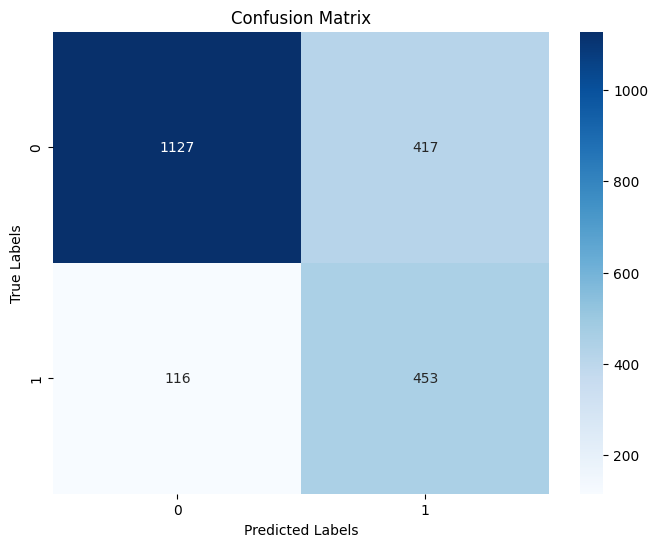

In [237]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [240]:
y_pred = knn_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1544
           1       0.61      0.55      0.58       569

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



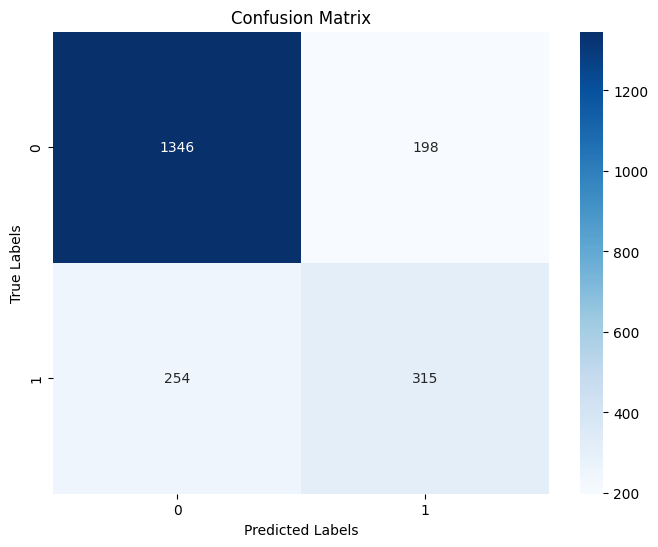

In [241]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [242]:
y_pred = nb_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1544
           1       0.45      0.85      0.59       569

    accuracy                           0.68      2113
   macro avg       0.68      0.73      0.66      2113
weighted avg       0.79      0.68      0.70      2113



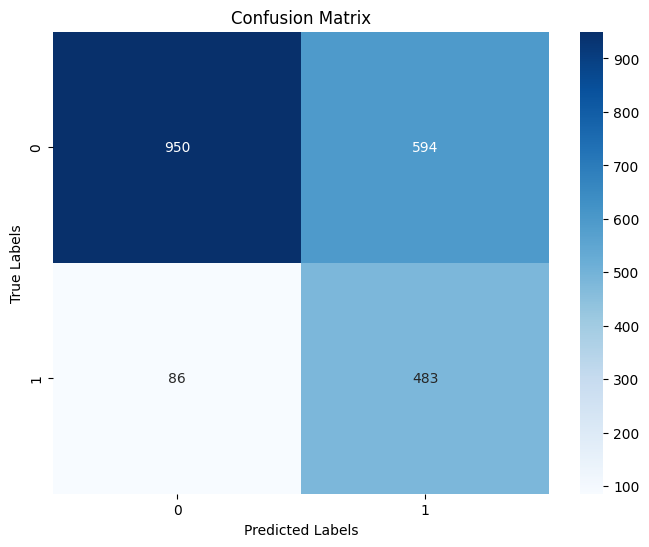

In [243]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

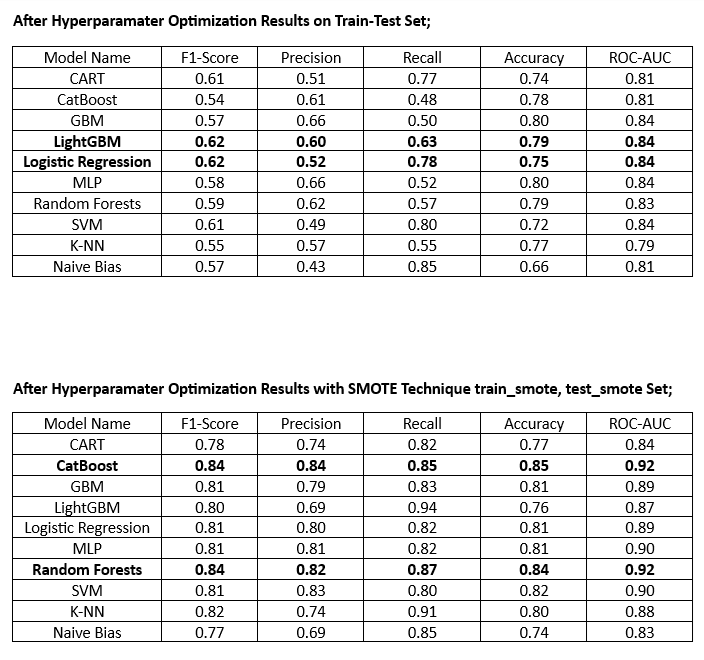